In [1]:
! pip install opencv-python matplotlib numpy scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 2.2 MB/s  0:00:05m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.7 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [scikit-image] [scikit-image]


/var/folders/fp/g3zls4b920v1wt_5w_yp_4d00000gn/T/ipykernel_41620/3048448593.py:26: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(original.ravel(), 256, [0, 256])
/var/folders/fp/g3zls4b920v1wt_5w_yp_4d00000gn/T/ipykernel_41620/3048448593.py:35: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(equalized.ravel(), 256, [0, 256])


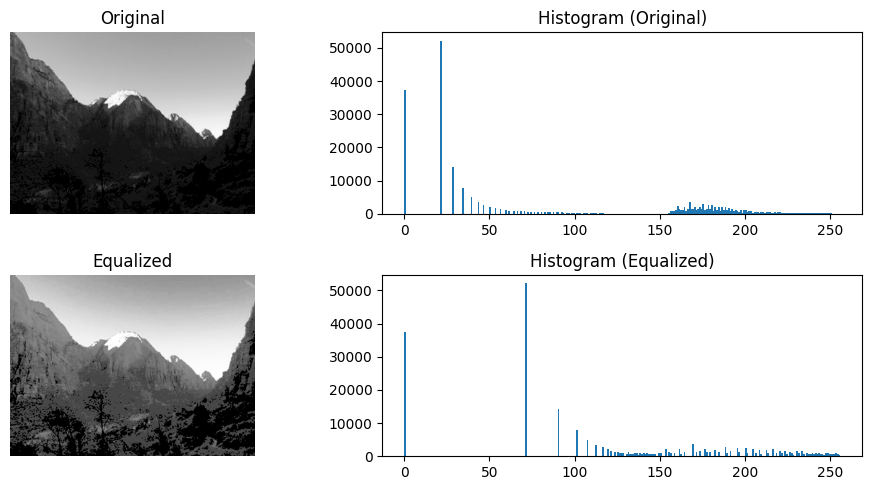

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def load_image(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found")
    return image


def equalize_image(image):
    return cv2.equalizeHist(image)


def plot_result(original, equalized):
    plt.figure(figsize=(10, 5))

    plt.subplot(2, 2, 1)
    plt.imshow(original, cmap="gray")
    plt.title("Original")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.hist(original.ravel(), 256, [0, 256])
    plt.title("Histogram (Original)")

    plt.subplot(2, 2, 3)
    plt.imshow(equalized, cmap="gray")
    plt.title("Equalized")
    plt.axis("off")

    plt.subplot(2, 2, 4)
    plt.hist(equalized.ravel(), 256, [0, 256])
    plt.title("Histogram (Equalized)")

    plt.tight_layout()
    plt.show()


image_path = "labe_images/1.png"

original = load_image(image_path)
equalized = equalize_image(original)
plot_result(original, equalized)




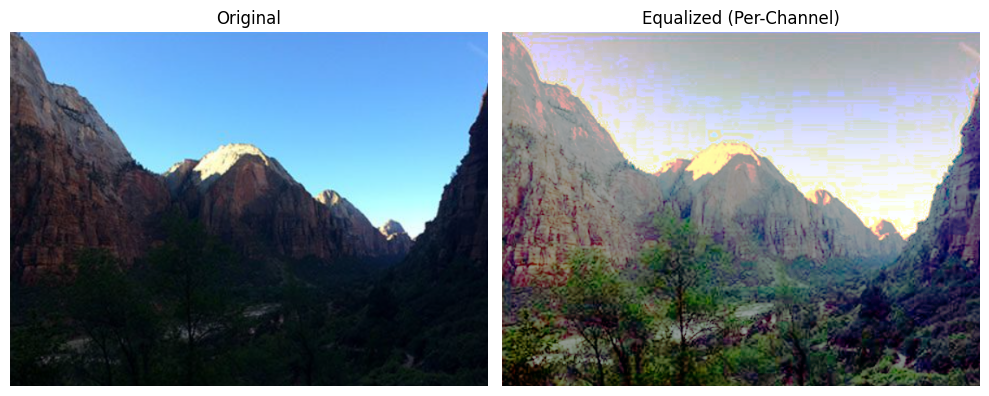

In [4]:
import cv2
import matplotlib.pyplot as plt


def load_color_image(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    if image is None:
        raise ValueError("Image not found")
    return image


def equalize_bgr_channels(image_bgr):
    b, g, r = cv2.split(image_bgr)
    b = cv2.equalizeHist(b)
    g = cv2.equalizeHist(g)
    r = cv2.equalizeHist(r)
    return cv2.merge((b, g, r))


def show_before_after(original_bgr, equalized_bgr):
    original_rgb = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2RGB)
    equalized_rgb = cv2.cvtColor(equalized_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(equalized_rgb)
    plt.title("Equalized (Per-Channel)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


image_path = "lab_images/1.png"
original = load_color_image(image_path)
equalized = equalize_bgr_channels(original)
show_before_after(original, equalized)


/var/folders/fp/g3zls4b920v1wt_5w_yp_4d00000gn/T/ipykernel_41620/1144437862.py:27: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(source.ravel(), 256, [0, 256])
/var/folders/fp/g3zls4b920v1wt_5w_yp_4d00000gn/T/ipykernel_41620/1144437862.py:36: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(target.ravel(), 256, [0, 256])
/var/folders/fp/g3zls4b920v1wt_5w_yp_4d00000gn/T/ipykernel_41620/1144437862.py:45: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(matched.ravel(), 256, [0, 256])


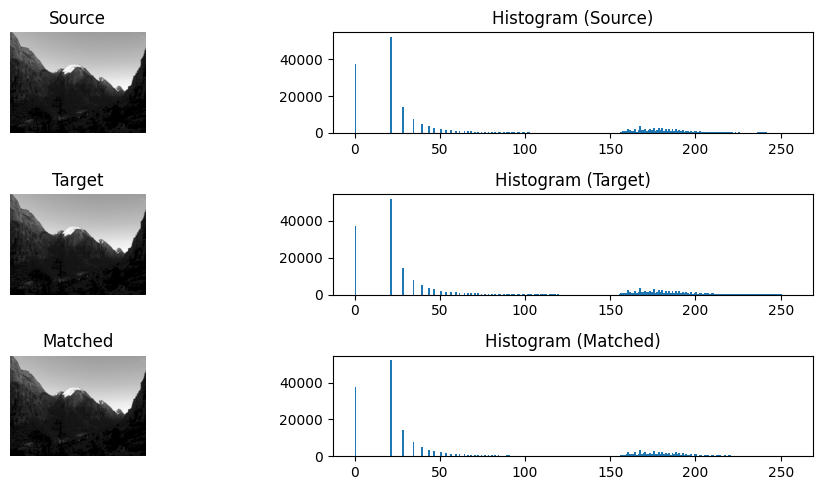

In [8]:
import cv2
import matplotlib.pyplot as plt
from skimage import exposure


def load_grayscale(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found")
    return image


def match_histogram(source, target):
    matched = exposure.match_histograms(source, target)
    return matched.astype("uint8")


def show_result(source, target, matched):
    plt.figure(figsize=(15, 5))

    plt.subplot(3, 3, 1)
    plt.imshow(source, cmap="gray")
    plt.title("Source")
    plt.axis("off")

    plt.subplot(3, 3, 2)
    plt.hist(source.ravel(), 256, [0, 256])
    plt.title("Histogram (Source)")

    plt.subplot(3, 3, 4)
    plt.imshow(target, cmap="gray")
    plt.title("Target")
    plt.axis("off")

    plt.subplot(3, 3, 5)
    plt.hist(target.ravel(), 256, [0, 256])
    plt.title("Histogram (Target)")

    plt.subplot(3, 3, 7)
    plt.imshow(matched, cmap="gray")
    plt.title("Matched")
    plt.axis("off")

    plt.subplot(3, 3, 8)
    plt.hist(matched.ravel(), 256, [0, 256])
    plt.title("Histogram (Matched)")

    plt.tight_layout()
    plt.show()


source_path = "lab_images/1.png"
target_path = "lab_images/1.png"

source = load_grayscale(source_path)
target = load_grayscale(target_path)
matched = match_histogram(source, target)
show_result(source, target, matched)



/var/folders/fp/g3zls4b920v1wt_5w_yp_4d00000gn/T/ipykernel_41620/3929996847.py:46: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(original.ravel(), 256, [0, 256])
/var/folders/fp/g3zls4b920v1wt_5w_yp_4d00000gn/T/ipykernel_41620/3929996847.py:50: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(equalized.ravel(), 256, [0, 256])
/var/folders/fp/g3zls4b920v1wt_5w_yp_4d00000gn/T/ipykernel_41620/3929996847.py:54: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(target.ravel(), 256, [0, 256])
/var/folders/fp/g3zls4b920v1wt_5w_yp_4d00000gn/T/ipykernel_41620/3929996847.py:58: MatplotlibDeprecationWarning: Passing t

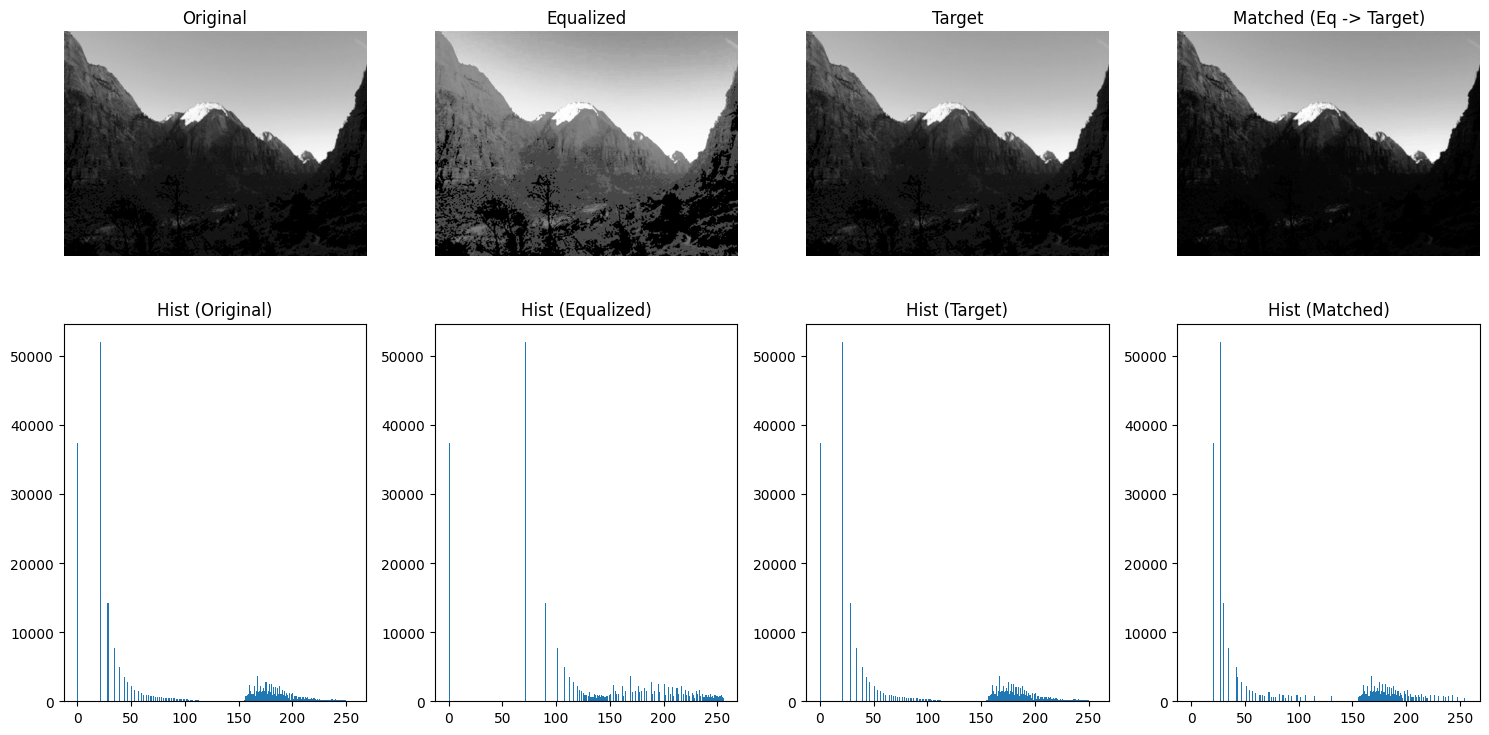

In [9]:
import cv2
import matplotlib.pyplot as plt
from skimage import exposure


def load_grayscale(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found")
    return image


def equalize(image):
    return cv2.equalizeHist(image)


def match_histogram(source, target):
    matched = exposure.match_histograms(source, target)
    return matched.astype("uint8")


def show_result(original, equalized, target, matched):
    plt.figure(figsize=(15, 8))

    plt.subplot(2, 4, 1)
    plt.imshow(original, cmap="gray")
    plt.title("Original")
    plt.axis("off")

    plt.subplot(2, 4, 2)
    plt.imshow(equalized, cmap="gray")
    plt.title("Equalized")
    plt.axis("off")

    plt.subplot(2, 4, 3)
    plt.imshow(target, cmap="gray")
    plt.title("Target")
    plt.axis("off")

    plt.subplot(2, 4, 4)
    plt.imshow(matched, cmap="gray")
    plt.title("Matched (Eq -> Target)")
    plt.axis("off")

    plt.subplot(2, 4, 5)
    plt.hist(original.ravel(), 256, [0, 256])
    plt.title("Hist (Original)")

    plt.subplot(2, 4, 6)
    plt.hist(equalized.ravel(), 256, [0, 256])
    plt.title("Hist (Equalized)")

    plt.subplot(2, 4, 7)
    plt.hist(target.ravel(), 256, [0, 256])
    plt.title("Hist (Target)")

    plt.subplot(2, 4, 8)
    plt.hist(matched.ravel(), 256, [0, 256])
    plt.title("Hist (Matched)")

    plt.tight_layout()
    plt.show()


source_path = "lab_images/1.png"
target_path = "lab_images/1.png"

original = load_grayscale(source_path)
target = load_grayscale(target_path)

equalized = equalize(original)
matched = match_histogram(equalized, target)

show_result(original, equalized, target, matched)


